Machine Learning Assignement 
A comparative Study of KNN and Logistic Regression for Medicinal Plant Symptom Classification 

BY Sabrina EL-HASSANI & Sarah YOUSSEF

1. Data Understanding

Imports the required libraries, configures the environment, loads the dataset from a CSV file, and displays the first rows to verify successful data loading.

In [69]:
# First, we'll import pandas
import pandas as pd

# We'll also import seaborn, and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

# Next, we'll load our dataset
med = pd.read_csv("C:/Users/Sarah Efrei/OneDrive/Desktop/2025-2026/S5/Machine Learning/Group Assignment/pfaf_plants_merged.csv") # the iris dataset is now a Pandas DataFrame

med.head()

,use_keyword,latin_name_search,common_name_search,edibility_rating_search,medicinal_rating_search,plant_url,Care Requirements,Common Name,Common Names,Cultivation Details,...,Native Range,Other Uses,Other Uses Rating,Propagation,Range,Scientific Name,Special Uses,Summary,USDA hardiness,Weed Potential
0,Stomachic,Abelmoschus moschatus,"Musk Mallow,Musk Okra",2,3,https://pfaf.org/user/Plant.aspx?LatinName=Abe...,Moist Soil; Half Hardy; Full sun,"Musk Mallow,Musk Okra","Musk Mallow,Musk Okra",Easily grown in a rich well-drained soil in a ...,...,"TEMPERATE ASIA: China (Hunan Sheng, Jiangxi Sh...",Essential Fibre Insecticide Oil Size An essent...,3.0,Seed - sow April in a greenhouse. The seed ger...,S.E. Asia - Himalayas to China and Vietnam.,Abelmoschus moschatus - Medik.,Scented Plants,NaN,8-11,No
1,Stomachic,Abies grandis,"Grand Fir, Giant Fir, Lowland White Fir",2,2,https://pfaf.org/user/Plant.aspx?LatinName=Abi...,Semi-shade; Fully Hardy; Moist Soil; Full shad...,"Grand Fir, Giant Fir, Lowland White Fir","Grand Fir, Giant Fir, Lowland White Fir","Landscape Uses:Screen, Specimen. Prefers a goo...",...,"NORTHERN AMERICA: Canada (British Columbia), U...",Baby care Dye Gum Incense Repellent Roofing Wo...,3.0,Seed - sow early February in a greenhouse or o...,Western N. America - British Columbia to Calif...,Abies grandis - (Douglas. ex D.Don.)Lindl.,Food Forest Scented Plants,"Form: Columnar, Upright or erect.",5-6,No
2,Stomachic,Abies spectabilis,Himalayan Fir,0,2,https://pfaf.org/user/Plant.aspx?LatinName=Abi...,Semi-shade; Fully Hardy; Moist Soil; Full shad...,Himalayan Fir,Himalayan Fir,Prefers a good moist but not water-logged soil...,...,"TEMPERATE ASIA: Afghanistan, China (Xizang Ziz...",Essential Fuel Incense Wood An essential oil i...,3.0,Seed - sow early February in a greenhouse or o...,E. Asia - Himalayas from Afghanistan to Nepal.,Abies spectabilis - (D.Don.)Spach.,Scented Plants,NaN,6-9,No
3,Stomachic,Abutilon theophrasti,"China Jute, Velvetleaf, Butterprint Buttonweed...",3,2,https://pfaf.org/user/Plant.aspx?LatinName=Abu...,Semi-shade; Fully Hardy; Well drained soil; Mo...,"China Jute, Velvetleaf, Butterprint Buttonweed...","China Jute, Velvetleaf, Butterprint Buttonweed...",Requires full sun or part day shade and a fert...,...,"TEMPERATE ASIA: Afghanistan, Egypt (Sinai), Ir...",Fibre Oil Paper A fibre obtained from the stem...,4.0,Seed - sow early April in a greenhouse. Germin...,Asia - tropical. Naturalised in S.E. Europe an...,Abutilon theophrasti - Medik.,NaN,Form: Upright or erect.,Coming soon,Yes
4,Stomachic,Acacia farnesiana,"Sweet Acacia, Perfume Acacia, Huisache",2,2,https://pfaf.org/user/Plant.aspx?LatinName=Aca...,Moist Soil; Frost Hardy; Full sun; Well draine...,"Sweet Acacia, Perfume Acacia, Huisache","Sweet Acacia, Perfume Acacia, Huisache",Landscape Uses: Pest tolerant. Originally trop...,...,NORTHERN AMERICA: United States (Florida (nort...,Adhesive Dye Essential Gum Gum Ink Tannin Teet...,4.0,Seed - best sown as soon as it is ripe in a su...,"The original range is uncertain, but is probab...",Acacia farnesiana - (L.)Willd.,Nitrogen Fixer Scented Plants,Bloom Color: Yellow. Main Bloom Time: Early su...,9-11,Yes


In [70]:
med.tail() # Let's see the last 5 records in the dataset

,use_keyword,latin_name_search,common_name_search,edibility_rating_search,medicinal_rating_search,plant_url,Care Requirements,Common Name,Common Names,Cultivation Details,...,Native Range,Other Uses,Other Uses Rating,Propagation,Range,Scientific Name,Special Uses,Summary,USDA hardiness,Weed Potential
17945,Anthelmintic,Pericopsis angolensis,East African afrormosia,0,2,https://pfaf.org/user/Plant.aspx?LatinName=Per...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17946,Anthelmintic,Phytolacca dodecandra,"Endod, Pokeberry",2,3,https://pfaf.org/user/Plant.aspx?LatinName=Phy...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17947,Anthelmintic,Pycnanthus angolensis,African Nutmeg,2,3,https://pfaf.org/user/Plant.aspx?LatinName=Pyc...,Moist Soil; Full sun; Tender,African Nutmeg,African Nutmeg,"A plant of the moist tropics, where it can be ...",...,"AFRICA: Sudan, Chad, Tanzania, Uganda, Burundi...",Cosmetic Fuel Furniture Lighting Parasiticide ...,4.0,Seed - it has a short viability and should be ...,"Tropical Africa - Senegal to Sudan and Uganda,...",Pycnanthus angolensis - (Welw.) Warb.,NaN,"Native to Tropical Africa, African nutmeg or P...",10-12,No
17948,Anthelmintic,Senna alata,"Ringworm Bush, Candle Bush, Empress Candle Plant",2,4,https://pfaf.org/user/Plant.aspx?LatinName=Sen...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17949,Anthelmintic,Tabernanthe iboga,Iboga,0,4,https://pfaf.org/user/Plant.aspx?LatinName=Tab...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
med.shape # Let's see how many rows and columns are in the dataset

(17950, 27)

Computes summary statistics (count, mean, standard deviation, minimum, maximum, and quartiles) for numerical variables to understand their distribution and scale.

In [72]:
med.describe()

,edibility_rating_search,medicinal_rating_search,Edibility Rating,Medicinal Rating,Other Uses Rating
count,17950.000000,17950.000000,14283.000000,14283.000000,14283.000000
mean,1.944011,2.353203,1.908353,2.270251,1.853112
std,1.440458,0.969669,1.436930,0.964604,1.447678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [73]:
med.info() # Get a summary of the dataset, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17950 entries, 0 to 17949
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   use_keyword              17950 non-null  object 
 1   latin_name_search        17950 non-null  object 
 2   common_name_search       16132 non-null  object 
 3   edibility_rating_search  17950 non-null  int64  
 4   medicinal_rating_search  17950 non-null  int64  
 5   plant_url                17950 non-null  object 
 6   Care Requirements        14283 non-null  object 
 7   Common Name              12700 non-null  object 
 8   Common Names             12700 non-null  object 
 9   Cultivation Details      14281 non-null  object 
 10  Edibility Rating         14283 non-null  float64
 11  Edible Uses              14283 non-null  object 
 12  Family                   14283 non-null  object 
 13  Image URLs               14283 non-null  object 
 14  Known Hazards         

Target Variable Distribution Analysis

In [74]:
med['use_keyword'].value_counts()

use_keyword
Diuretic          1000
Astringent         975
Tonic              829
Febrifuge          809
Stomachic          552
                  ... 
Plaster              8
Antiaphonic          8
Antiecchymotic       8
Enuresis             7
Errhine              4
Name: count, Length: 120, dtype: int64

Extract list of use_keywords (symptoms)

In [75]:
symptoms = sorted(med["use_keyword"].dropna().unique())

print(symptoms)

['Abortifacient', 'Acrid', 'Adaptogen', 'Alterative', 'Anaesthetic', 'Analgesic', 'Anaphrodisiac', 'Anodyne', 'Antacid', 'Anthelmintic', 'Antiaphonic', 'Antiarthritic', 'Antiasthmatic', 'Antibacterial', 'Antibilious', 'Antibiotic', 'Anticholesterolemic', 'Anticoagulant', 'Antidandruff', 'Antidermatosic', 'Antidote', 'Antiecchymotic', 'Antiemetic', 'Antifungal', 'Antihaemorrhoidal', 'Antihalitosis', 'Antihydrotic', 'Antiinflammatory', 'Antiperiodic', 'Antiphlogistic', 'Antipruritic', 'Antipyretic', 'Antirheumatic', 'Antiscorbutic', 'Antiscrophulatic', 'Antiseptic', 'Antispasmodic', 'Antitumor', 'Antitussive', 'Antivinous', 'Antiviral', 'Aperient', 'Aphrodisiac', 'Appetizer', 'Aromatherapy', 'Aromatic', 'Astringent', 'Bach', 'Balsamic', 'Bitter', 'Cytotoxic', 'Decongestant', 'Demulcent', 'Deobstruent', 'Deodorant', 'Depurative', 'Detergent', 'Diaphoretic', 'Digestive', 'Disinfectant', 'Diuretic', 'Emetic', 'Emmenagogue', 'Emollient', 'Enuresis', 'Errhine', 'Expectorant', 'Febrifuge', 'Fo

Target Class Definition and Label Grouping

Class 0: Represents mild, supportive, or cosmetic medicinal uses with generally low physiological impact.

In [76]:
class_0 = [
    'Adaptogen', 'Aromatic', 'Aromatherapy', 'Appetizer', 'Bach',
    'Balsamic', 'Bitter', 'Deodorant', 'Digestive', 'Emollient',
    'Foot care', 'Lenitive', 'Mouthwash', 'Nutritive', 'Plaster',
    'Poultice', 'Refrigerant', 'Restorative', 'Salve',
    'Skin', 'Stomachic', 'Tonic'
]


Class 1: Represents common therapeutic and medicinal treatments widely used for treating symptoms or diseases.

In [77]:
class_1 = [
    'Alterative', 'Anaesthetic', 'Analgesic', 'Anodyne', 'Antacid',
    'Anthelmintic', 'Antiarthritic', 'Antiasthmatic', 'Antibacterial',
    'Antibilious', 'Antibiotic', 'Antidandruff', 'Antidermatosic',
    'Antiemetic', 'Antifungal', 'Antihaemorrhoidal',
    'Antihalitosis', 'Antihydrotic', 'Antiinflammatory',
    'Antiperiodic', 'Antiphlogistic', 'Antipruritic',
    'Antipyretic', 'Antirheumatic', 'Antiscorbutic',
    'Antiseptic', 'Antispasmodic', 'Antitussive', 'Antiviral',
    'Aperient', 'Astringent', 'Decongestant', 'Demulcent',
    'Depurative', 'Detergent', 'Diaphoretic', 'Disinfectant',
    'Diuretic', 'Emetic', 'Emmenagogue', 'Enuresis',
    'Errhine', 'Expectorant', 'Febrifuge', 'Galactofuge',
    'Galactogogue', 'Hepatic', 'Hydrogogue', 'Hypoglycaemic',
    'Hypotensive', 'Kidney', 'Laxative', 'Lithontripic',
    'Miscellany', 'Nervine', 'Odontalgic', 'Ophthalmic',
    'Parasiticide', 'Pectoral', 'Purgative', 'Resolvent',
    'Rubefacient', 'Sedative', 'Sialagogue', 'Sternutatory',
    'Stimulant', 'Stings', 'Styptic', 'Uterine tonic',
    'Vasoconstrictor', 'Vasodilator', 'Vermifuge'
]


Class 2: Represents potent, toxic, or high-risk medicinal effects requiring careful medical supervision.

In [78]:
class_2 = [
    'Abortifacient', 'Acrid', 'Anaphrodisiac', 'Anticholesterolemic',
    'Anticoagulant', 'Antidote', 'Antiecchymotic',
    'Antiscrophulatic', 'Antitumor', 'Antivinous',
    'Cytotoxic', 'Haemolytic', 'Haemostatic',
    'Hallucinogenic', 'Hypnotic', 'Infertility',
    'Irritant', 'Mydriatic', 'Narcotic',
    'Oxytoxic', 'TB', 'VD', 'Vesicant'
]


Target Variable Encoding and Class Mapping

In [79]:
def map_symptom(symptom):
    if symptom in class_0:
        return 0
    elif symptom in class_1:
        return 1
    elif symptom in class_2:
        return 2
    else:
        return 1  # Default to class 1 if not found

med["symptom_class"] = med["use_keyword"].apply(map_symptom)


Class Distribution Analysis After Target Mapping

In [80]:
med["symptom_class"].value_counts()
med["symptom_class"].value_counts(normalize=True)


symptom_class
1    0.741114
0    0.196212
2    0.062674
Name: proportion, dtype: float64

Detecting Missing Values 

med.isnull().sum() 

In [81]:
100 * med.isnull().sum() / len(med)

use_keyword                 0.000000
latin_name_search           0.000000
common_name_search         10.128134
edibility_rating_search     0.000000
medicinal_rating_search     0.000000
plant_url                   0.000000
Care Requirements          20.428969
Common Name                29.247911
Common Names               29.247911
Cultivation Details        20.440111
Edibility Rating           20.428969
Edible Uses                20.428969
Family                     20.428969
Image URLs                 20.428969
Known Hazards              20.428969
Medicinal Properties       20.428969
Medicinal Rating           20.428969
Native Range               20.579387
Other Uses                 20.428969
Other Uses Rating          20.428969
Propagation                20.523677
Range                      20.479109
Scientific Name            20.428969
Special Uses               53.949861
Summary                    67.019499
USDA hardiness             20.428969
Weed Potential             20.428969
s

# Visualize the distribution of the 'use_keyword' feature

before mapping

<Axes: xlabel='use_keyword', ylabel='count'>

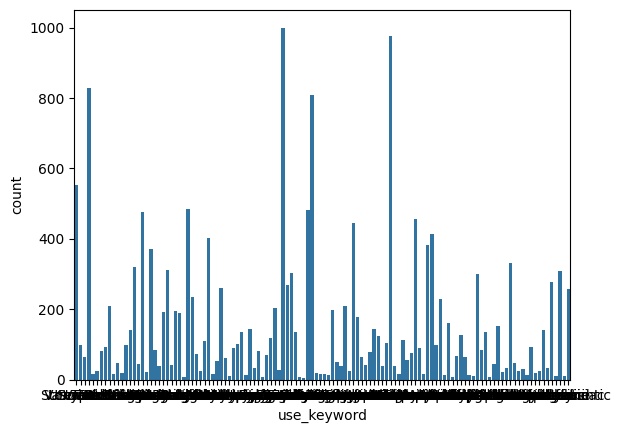

In [82]:
sns.countplot(x=med['use_keyword']) 

After mapping

<Axes: xlabel='symptom_class', ylabel='count'>

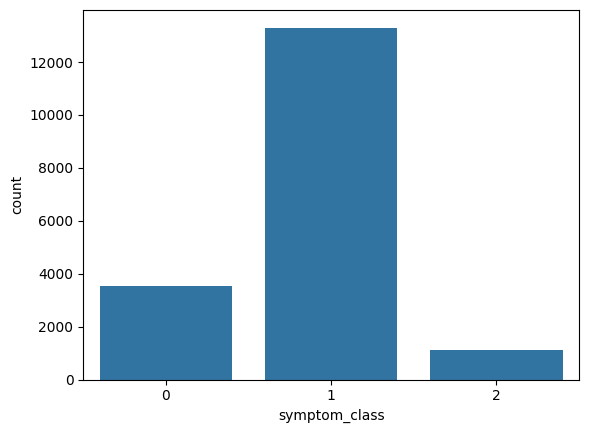

In [83]:
sns.countplot(x=med['symptom_class']) 

Distribution Analysis of Medicinal Rating

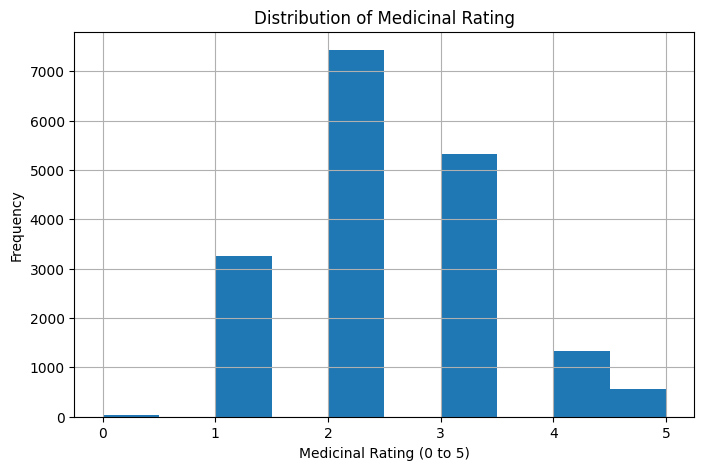

In [84]:
plt.figure(figsize=(8,5))
med['medicinal_rating_search'].hist()
plt.title("Distribution of Medicinal Rating")
plt.xlabel("Medicinal Rating (0 to 5)")
plt.ylabel("Frequency")
plt.show()


Displays the count of observations for each medicinal rating value to highlight dominant ratings and potential data imbalance.

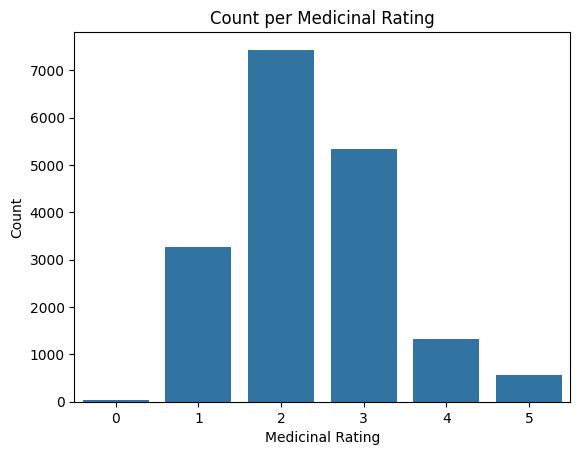

In [85]:
sns.countplot(x=med['medicinal_rating_search'])
plt.title("Count per Medicinal Rating")
plt.xlabel("Medicinal Rating")
plt.ylabel("Count")
plt.show()


Distribution Analysis of Edibility Rating

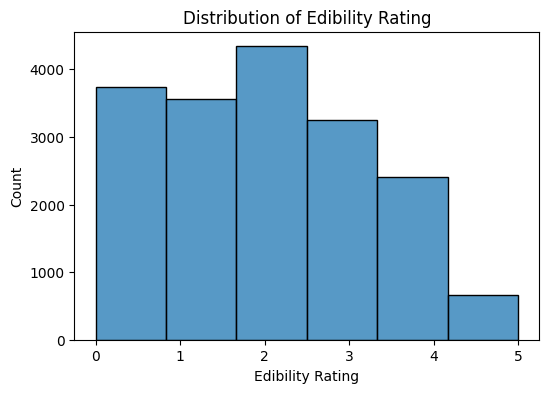

In [86]:
plt.figure(figsize=(6,4))
sns.histplot(med['edibility_rating_search'], bins=6)
plt.title('Distribution of Edibility Rating')
plt.xlabel('Edibility Rating')
plt.ylabel('Count')
plt.show()

Distribution Analysis of Weed Potential

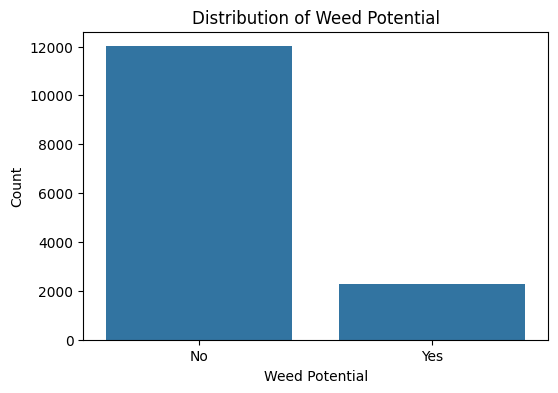

In [87]:
plt.figure(figsize=(6,4))
sns.countplot(x=med['Weed Potential'], order=med['Weed Potential'].value_counts().index)
plt.title('Distribution of Weed Potential')
plt.xlabel('Weed Potential')
plt.ylabel('Count')
plt.show()

Distribution Analysis of USDA Hardiness Zones

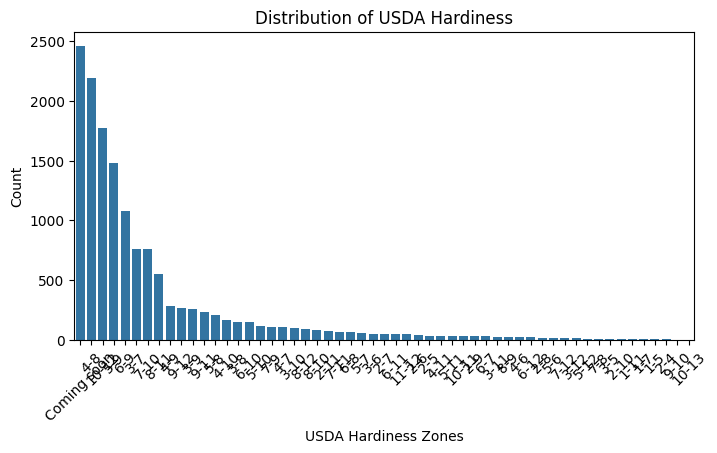

In [88]:
plt.figure(figsize=(8,4))
sns.countplot(x=med['USDA hardiness'], order=med['USDA hardiness'].value_counts().index)
plt.title('Distribution of USDA Hardiness')
plt.xlabel('USDA Hardiness Zones')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

DATA CLEANING

Feature Selection and Dataset Reduction

In [89]:
# Columns to keep for the model symptoms -> plants
cols_to_keep = [
    'symptom_class',               # target → symptom
    'medicinal_rating_search',   # feature
    'edibility_rating_search',   # feature
    'USDA hardiness',            # feature
    'Weed Potential',            # feature
    'common_name_search'         # identifier only
]


#  Create a new DataFrame with only the selected columns
med_clean = med[cols_to_keep].copy()

# View the cleaned DataFrame
med_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17950 entries, 0 to 17949
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   symptom_class            17950 non-null  int64 
 1   medicinal_rating_search  17950 non-null  int64 
 2   edibility_rating_search  17950 non-null  int64 
 3   USDA hardiness           14283 non-null  object
 4   Weed Potential           14283 non-null  object
 5   common_name_search       16132 non-null  object
dtypes: int64(3), object(3)
memory usage: 841.5+ KB


Handling missing values 

In [90]:
med_clean['common_name_search'] = med_clean['common_name_search'].fillna('unknown')
med_clean['USDA hardiness'] = med_clean['USDA hardiness'].fillna('unknown')
med_clean['USDA hardiness'] = med_clean['USDA hardiness'].replace('Coming soon', 'unknown')
med_clean['Weed Potential'] = med_clean['Weed Potential'].fillna('unknown')

Normalization and text cleaning 

In [91]:
med_clean['common_name_search'] = med_clean['common_name_search'].str.lower().str.strip()
med_clean['USDA hardiness'] = med_clean['USDA hardiness'].str.lower().str.strip()
med_clean['Weed Potential'] = med_clean['Weed Potential'].str.lower().str.strip()
med_clean['USDA hardiness'] = med_clean['USDA hardiness'].replace('coming soon', 'unknown')


Renames Columns 

In [92]:
med_clean = med_clean.rename(columns={
    'symptom_class': 'symptom',
    'medicinal_rating_search': 'medicinal_rating',
    'edibility_rating_search': 'edibility_rating',
    'USDA hardiness': 'usda_hardiness',
    'Weed Potential': 'weed_potential',
    'common_name_search': 'plant'
})

#Some verifications
med_clean.info()
med_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17950 entries, 0 to 17949
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   symptom           17950 non-null  int64 
 1   medicinal_rating  17950 non-null  int64 
 2   edibility_rating  17950 non-null  int64 
 3   usda_hardiness    17950 non-null  object
 4   weed_potential    17950 non-null  object
 5   plant             17950 non-null  object
dtypes: int64(3), object(3)
memory usage: 841.5+ KB


,symptom,medicinal_rating,edibility_rating,usda_hardiness,weed_potential,plant
0,0,3,2,8-11,no,"musk mallow,musk okra"
1,0,2,2,5-6,no,"grand fir, giant fir, lowland white fir"
2,0,2,0,6-9,no,himalayan fir
3,0,2,3,unknown,yes,"china jute, velvetleaf, butterprint buttonweed..."
4,0,2,2,9-11,yes,"sweet acacia, perfume acacia, huisache"


Final Data Consistency Checks Before Splitting

In [93]:
med_clean.isnull().sum()
med_clean['symptom'].unique()[:20]
med_clean['usda_hardiness'].unique()[:20]
med_clean['weed_potential'].unique()[:20]
med_clean.dtypes
med_clean.apply(lambda col: col[col == ""].count())
med_clean.shape
med_clean["symptom"].value_counts()


symptom
1    13303
0     3522
2     1125
Name: count, dtype: int64

Train/Test Split with stratification

In [94]:
from sklearn.model_selection import train_test_split

X = med_clean[['medicinal_rating', 'edibility_rating', 'usda_hardiness', 'weed_potential']]
y = med_clean['symptom']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Validation of Train–Test Split

In [95]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape
set(y_test.unique()).issubset(set(y_train.unique()))
y_train.value_counts(normalize=True)


symptom
1    0.741086
0    0.196240
2    0.062674
Name: proportion, dtype: float64

Feature Encoding 

In [96]:
categorical_features = ["usda_hardiness", "weed_potential"]
numeric_features = ["medicinal_rating", "edibility_rating"]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

print(X_train_enc.shape)
print(X_test_enc.shape)


(14360, 60)
(3590, 60)


Data Balancing 

In [97]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_bal, y_train_bal = ros.fit_resample(
    X_train_enc,
    y_train
)

import pandas as pd
pd.Series(y_train).value_counts(normalize=True)
pd.Series(y_train_bal).value_counts(normalize=True)


symptom
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64

MODEL IMPLEMENTATION

LOGISTIC REGRESSION

In [98]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    multi_class="auto",
    solver="lbfgs"
)

logreg.fit(X_train_enc, y_train)
y_pred_logreg = logreg.predict(X_test_enc)


Classification report & confusion matrix 

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_logreg))

confusion_matrix(y_test, y_pred_logreg)


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.21      0.43      0.28       704
           1       0.74      0.26      0.39      2661
           2       0.06      0.32      0.10       225

    accuracy                           0.30      3590
   macro avg       0.34      0.34      0.26      3590
weighted avg       0.59      0.30      0.35      3590



array([[ 306,  183,  215],
       [1092,  697,  872],
       [  93,   60,   72]])

Hyperparameter Tuning 

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"]
}


GridSearch fitting

In [101]:
grid_lr = GridSearchCV(
    LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        solver="lbfgs"
    ),
    param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train_enc, y_train)


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


Evaluation of best model

In [102]:
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_enc)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.20      0.41      0.27       704
           1       0.74      0.28      0.40      2661
           2       0.06      0.32      0.10       225

    accuracy                           0.31      3590
   macro avg       0.33      0.34      0.26      3590
weighted avg       0.59      0.31      0.36      3590



Feature scaling before KNN Classifier

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)


KNN CLASSIFIER 

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="minkowski"
)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


Evaluation of baseline

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

confusion_matrix(y_test, y_pred_knn)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.12      0.14       704
           1       0.74      0.87      0.80      2661
           2       0.00      0.00      0.00       225

    accuracy                           0.67      3590
   macro avg       0.31      0.33      0.31      3590
weighted avg       0.58      0.67      0.62      3590



array([[  82,  619,    3],
       [ 350, 2306,    5],
       [  19,  206,    0]])

KNN Hyparameter Grid Definition

In [108]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}


KNN Hyperparameter Optimization

In [109]:
from sklearn.model_selection import GridSearchCV

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)

print("Best parameters:", grid_knn.best_params_)
print("Best CV score:", grid_knn.best_score_)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV score: 0.3262818609687561


Optimized KNN Evaluation

In [110]:
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))
confusion_matrix(y_test, y_pred_knn)


              precision    recall  f1-score   support

           0       0.20      0.17      0.18       704
           1       0.74      0.82      0.78      2661
           2       0.07      0.01      0.02       225

    accuracy                           0.64      3590
   macro avg       0.33      0.33      0.32      3590
weighted avg       0.59      0.64      0.61      3590



array([[ 118,  580,    6],
       [ 459, 2180,   22],
       [  28,  195,    2]])